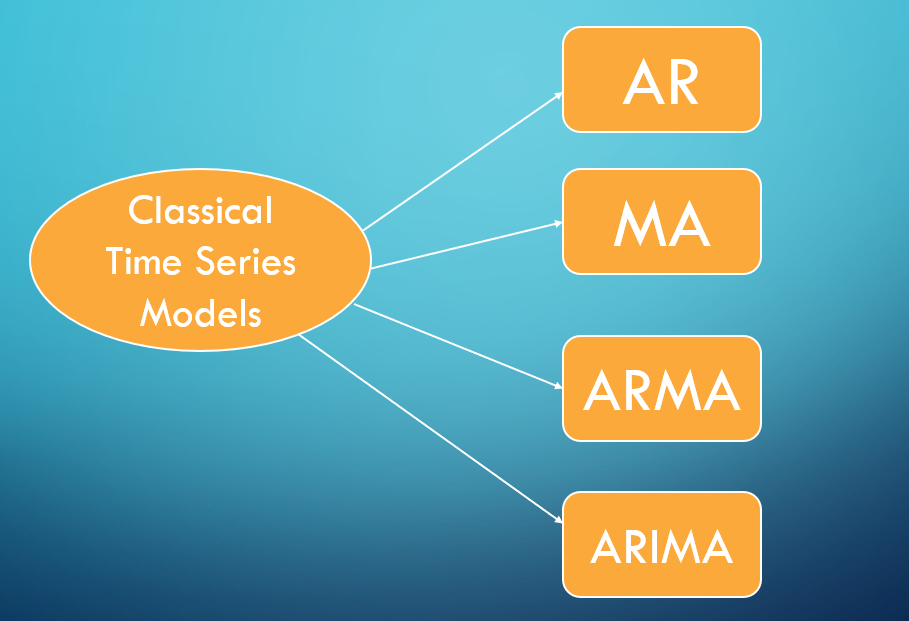

In [1]:
# put image here
from IPython.display import Image
Image(filename='classicalTSmodel.png') 

In [60]:
import warnings
warnings.filterwarnings('ignore')

# Auto regression example

In [1]:
# Auto Regression example - suitable for data without trend and seasonal component
from statsmodels.tsa.ar_model import AutoReg

# create a linear data
data = [10,12,14,16,18,20,20,22] #linear data 

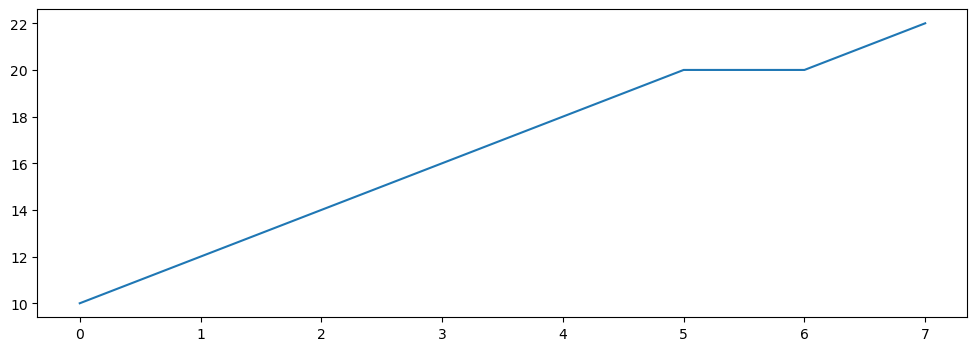

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

In [4]:
ARmodel = AutoReg(data,lags=1) #calling Auto regression model
ARmodel_fit = ARmodel.fit() #Fitting model

In [5]:
data

[10, 12, 14, 16, 18, 20, 20, 22]

In [10]:
# making predictions
ypredicted = ARmodel_fit.predict(8,10)
ypredicted

array([23.125     , 24.14453125, 25.06848145])

In [11]:
ypredicted.tolist()

[23.125000000000007, 24.144531250000014, 25.06848144531252]

In [12]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

In [15]:
combinedlist

[10,
 12,
 14,
 16,
 18,
 20,
 20,
 22,
 23.125000000000007,
 24.144531250000014,
 25.06848144531252]

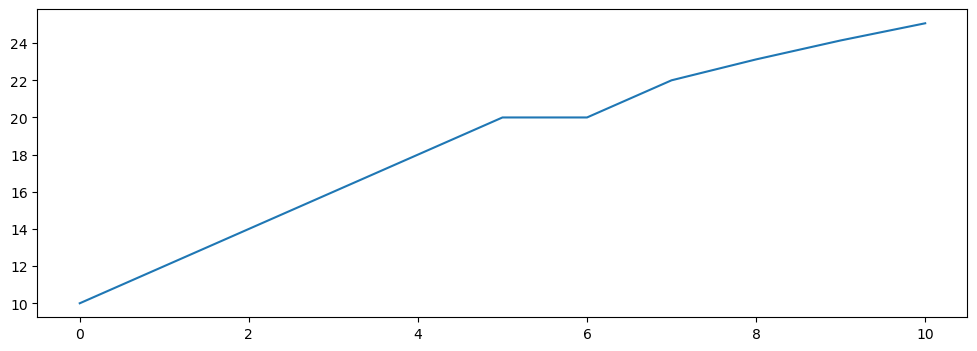

In [18]:
plt.figure(figsize=(12,4))


plt.plot(combinedlist)

plt.show()

# Moving average example

In [26]:
from statsmodels.tsa.arima.model import ARIMA  #suitable for data without trend and seasonality

In [51]:
# fit model
MAmodel = ARIMA(data, order=(0,0,1)) #model with AR=0,I=0, MA=1
MAmodel_fit = MAmodel.fit()

In [52]:
data

[10, 12, 14, 16, 18, 20, 20, 22]

In [54]:
# make prediction
ypredicted = MAmodel_fit.predict(8,10)
print(ypredicted)

[20.35252228 16.49895187 16.49895187]


In [55]:
pred_list = ypredicted.tolist()
combinedlist = data+pred_list

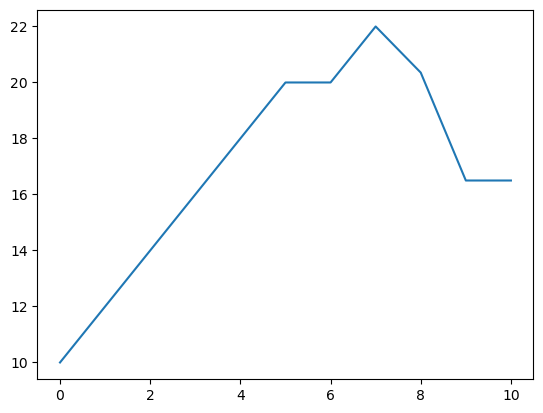

In [56]:
plt.plot(combinedlist)

# Autoregressive Moving Average (ARMA)

In [22]:

import pandas as pd
data = pd.read_csv(r'C:\Users\teach\Desktop\Qualcomm content\Time_Series\Module 6 and 7\train_data.csv', parse_dates=['Date'], index_col='Date')

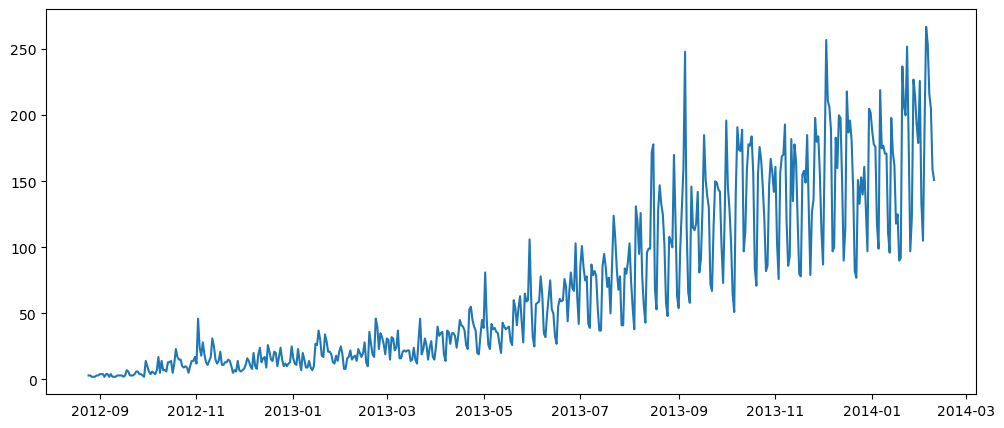

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

plt.plot(data['count'])
plt.show()

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
# fit model
ARMAmodel = ARIMA(data['count'], order=(1,0, 1))
ARmodel_fit = ARMAmodel.fit()

In [30]:
len(data)

534

In [33]:
# make prediction
ypredicted = ARmodel_fit.predict(1,len(data))
print(ypredicted)

2012-08-26     10.328361
2012-08-27     10.926656
2012-08-28      9.905303
2012-08-29      9.999756
2012-08-30      9.991017
                 ...    
2014-02-06    230.196457
2014-02-07    195.375171
2014-02-08    188.020672
2014-02-09    144.472823
2014-02-10    140.810206
Freq: D, Name: predicted_mean, Length: 534, dtype: float64


In [34]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [35]:
actual_value=data["count"]

In [36]:
len(actual_value)

534

In [37]:
len(ypredicted)

534

In [38]:
print(mean_absolute_error(actual_value,ypredicted))

6.402436119924044


In [39]:
import numpy as np

In [40]:
print(np.sqrt(mean_squared_error(actual_value,ypredicted)))

7.522774414753669


# Autoregressive Integrated Moving Average (ARIMA)

In [87]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
# fit model
ARIMAmodel = ARIMA(data['count'], order=(1, 1, 1)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

# make prediction
ypredicted = ARIMA_model_fit.predict(1, len(data))
print(ypredicted)

2012-08-26      2.999205
2012-08-27      2.999440
2012-08-28      2.356909
2012-08-29      2.289227
2012-08-30      2.242403
                 ...    
2014-02-06    210.468226
2014-02-07    195.124463
2014-02-08    191.160349
2014-02-09    170.343920
2014-02-10    165.930119
Freq: D, Name: predicted_mean, Length: 534, dtype: float64


In [64]:
actual_value=data["count"]

In [65]:
ypredicted

2012-08-26      2.999205
2012-08-27      2.999440
2012-08-28      2.356909
2012-08-29      2.289227
2012-08-30      2.242403
                 ...    
2014-02-06    210.468226
2014-02-07    195.124463
2014-02-08    191.160349
2014-02-09    170.343920
2014-02-10    165.930119
Freq: D, Name: predicted_mean, Length: 534, dtype: float64

In [66]:
print(mean_absolute_error(actual_value,ypredicted))

10.044653679894758


In [67]:
print(np.sqrt(mean_squared_error(actual_value,ypredicted)))

15.134909606759665


### SARIMA MODEL

In [68]:

from statsmodels.tsa.statespace.sarimax import SARIMAX



# 6. Build SARIMA Model
# SARIMA takes into account seasonality with (p, d, q) x (P, D, Q, s)
# Example assumes seasonal order (1, 1, 1, 12) for monthly seasonality


In [72]:
model_sarima = SARIMAX(data['count'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_sarima = model_sarima.fit()
data['SARIMA_Fitted'] = results_sarima.fittedvalues

# Forecast for next 10 steps using SARIMA
forecast_sarima = results_sarima.predict(1,len(data))
forecast_sarima

2012-08-26      2.999044
2012-08-27      2.999591
2012-08-28      2.000462
2012-08-29      2.000199
2012-08-30      2.000088
                 ...    
2014-02-06    234.571494
2014-02-07    196.202379
2014-02-08    177.035382
2014-02-09    161.273384
2014-02-10    165.900497
Freq: D, Name: predicted_mean, Length: 534, dtype: float64

In [73]:
print(mean_absolute_error(actual_value,forecast_sarima))

9.528591440550228


In [75]:
print(np.sqrt(mean_squared_error(actual_value,forecast_sarima)))

14.387692985904675
